# Comparing masses of point sources with HST and JWST

This notebook is divided in three sections:
1. HST: In this section, I have performed SED fitting on the point sources in the source in HST
2. JWST: Same as above but with JWST. 
3. HST vs JWST: In this section, I have visualized the SED fitting on the mutual sources in both HST and JWST so that it may be easier to study them. 

Below, I have also imaged the XRB candidate in HST and JWST for comparison. Note the black region is a cluster found from the Phangs cluster catalog.

In [28]:
from XRBID.CMDs import FitSED, PlotSED
from XRBID.Sources import LoadSources, Find, GetDaoPhots
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import os
cd = os.chdir

jwstdir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/JWST/'
hstdir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/'
chandra_hst_dir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-HST/'
chandra_jwst_dir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/'

## HST

In [29]:
DaoCleanMatch = LoadSources(hstdir+'M66_daoclean_matches.frame')

dist = 1.01e+7 # units pc from https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table
dmod = 5 * np.log10(dist) - 5
cd(hstdir)
DaoCleanPhots = GetDaoPhots(DaoCleanMatch, 
                            photfiles=['photometry_M66_f555w_wfc3_sources.ecsv',
                                       'photometry_M66_f438w_wfc3_sources.ecsv',
                                       'photometry_M66_f814w_wfc3_sources.ecsv',
                                       'photometry_M66_f275w_wfc3_sources.ecsv',
                                       'photometry_M66_f336w_wfc3_sources.ecsv'],
                            idheads=['F555W ID', 'F438W ID', 'F814W ID', 'F275W ID', 'F336W ID'],
                            filters=['F555W', 'F438W', 'F814W', 'F275W', 'F336W'],
                            magheader='aperture_mag_corr', dmod=dmod)

display(DaoCleanPhots)

Reading in sources from /Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/M66_daoclean_matches.frame...
Searching photometry_M66_f555w_wfc3_sources.ecsv
Searching photometry_M66_f438w_wfc3_sources.ecsv
Searching photometry_M66_f814w_wfc3_sources.ecsv
Searching photometry_M66_f275w_wfc3_sources.ecsv
Searching photometry_M66_f336w_wfc3_sources.ecsv


X            Y  F555W ID  F275W ID  F336W ID  F438W ID  \
0    3728.392237  5731.691614     18393       NaN   95500.0   34799.0   
1    3730.382900  5734.693669     18431       NaN       NaN       NaN   
2    3690.922608  5713.903685     18254       NaN   95118.0   34583.0   
3    3693.339708  5721.089782     18303       NaN       NaN       NaN   
4    3746.714500  5828.653600     19206       NaN       NaN   35989.0   
..           ...          ...       ...       ...       ...       ...   
257  3768.771693  8363.063045     34886  203812.0  157738.0   59483.0   
258  4463.710840  2888.783967      1804   48203.0       NaN       NaN   
259  3375.849092  2661.999469      1476       NaN   25603.0    5443.0   
260  3375.849092  2661.999469      1476       NaN   25753.0       NaN   
261  2253.377834  8911.615949     35145       NaN  162170.0   60333.0   

     F814W ID                 CSC ID      F555W  F555W Err      F438W  \
0     17413.0  2CXO J112014.9+125929 -12.003292  -0.044221 -11.206933   
1     17413.0  2CXO J112014.9+125929 -11.789961  -0.053822        NaN   
2         NaN  2CXO J112015.0+125928 -10.146309  -0.226729  -9.220154   
3         NaN  2CXO J112015.0+125928 -10.065977  -0.251969        NaN   
4         NaN  2CXO J112014.9+125933  -8.333958  -0.916613  -7.598539   
..        ...                    ...        ...        ...        ...   
257       NaN  2CXO J112014.9+130113  -5.414429  -0.161998  -5.115863   
258    1718.0  2CXO J112013.0+125736  -4.419194  -0.496001        NaN   
259    1413.0  2CXO J112015.9+125727  -6.330980  -0.055671  -6.398322   
260       NaN  2CXO J112015.9+125727  -6.330980  -0.055671        NaN   
261   33337.0  2CXO J112018.9+130135  -8.244793  -0.006251  -7.269488   

     F438W Err      F814W  F814W Err     F275W  F275W Err      F336W  \
0    -0.038940 -13.410549  -0.046098       NaN        NaN -10.554042   
1          NaN -13.410549  -0.046098       NaN        NaN        NaN   
2    -0.221970        NaN        NaN       NaN        NaN  -8.344256   
3          NaN        NaN        NaN       NaN        NaN        NaN   
4    -0.811469        NaN        NaN       NaN        NaN        NaN   
..         ...        ...        ...       ...        ...        ...   
257  -0.148391        NaN        NaN -4.189977  -0.252669  -5.613635   
258        NaN  -6.093560  -0.407560 -5.281671  -0.067507        NaN   
259  -0.042113  -6.038592  -0.206731       NaN        NaN  -6.705100   
260        NaN        NaN        NaN       NaN        NaN  -7.841630   
261  -0.009752  -9.199666  -0.008238       NaN        NaN  -7.718455   

     F336W Err  
0    -0.046133  
1          NaN  
2    -0.309419  
3          NaN  
4          NaN  
..         ...  
257  -0.073280  
258        NaN  
259  -0.063543  
260  -0.024830  
261  -0.014138  

[262 rows x 18 columns]

This is the image in HST


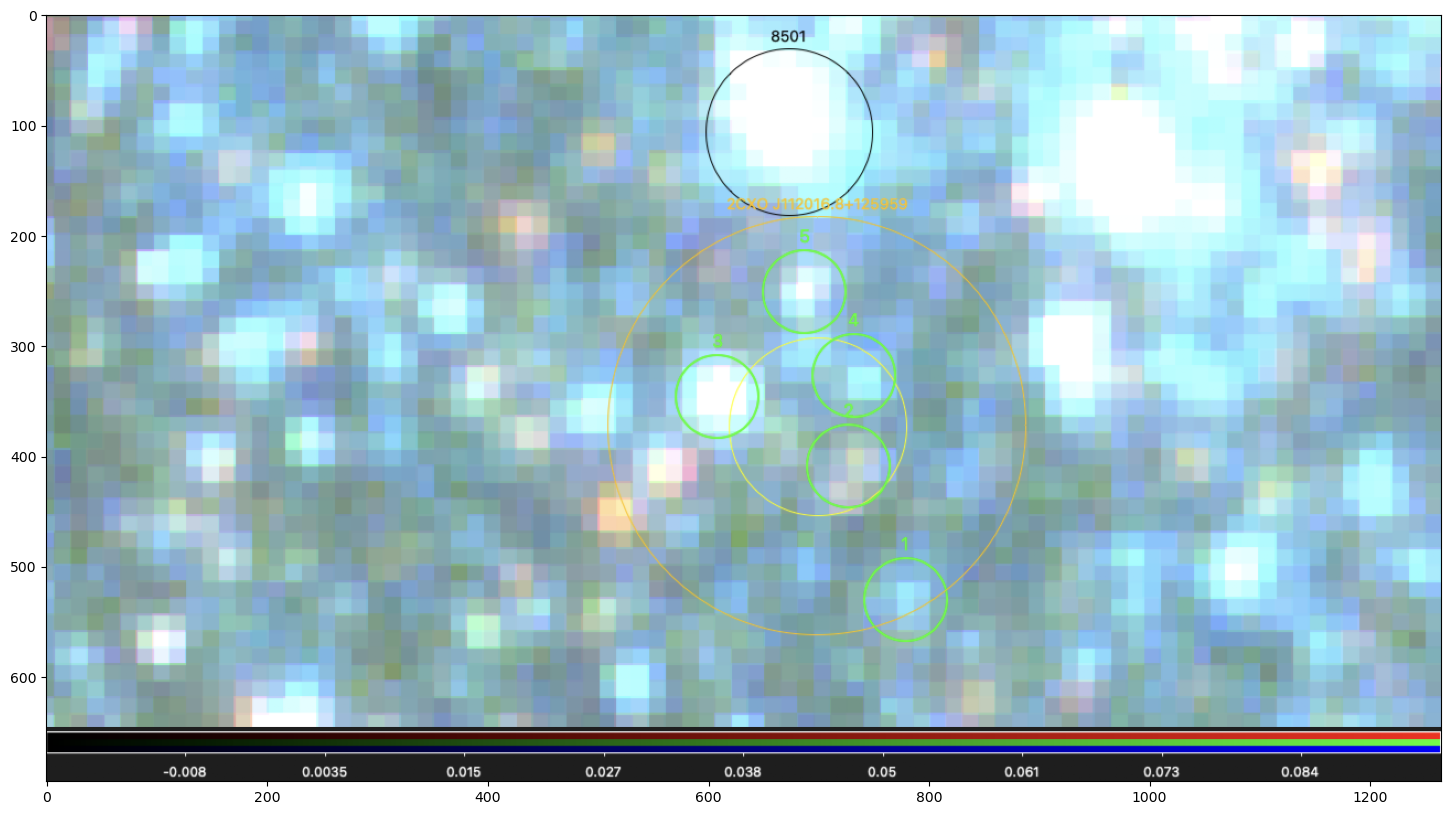

In [30]:
image1 = '/Users/undergradstudent/Downloads/source_in_hst.png'
cscid = '2CXO J112016.8+125959'

print('This is the image in HST')
plt.figure(figsize=(18, 15))
image1 = mpimg.imread(image1)
plt.imshow(image1)


plt.show()
cscid = '2CXO J112016.8+125959'

X            Y  ID  F555W ID  F275W ID  F336W ID  F438W ID  \
0  3054.090984  6478.379023   1     24417  152792.0  115869.0   44299.0   
1  3050.670990  6486.437136   2     24489  153046.0  116095.0   44387.0   
2  3042.724778  6490.637342   3     24541       NaN  116238.0   44454.0   
3  3050.950571  6491.911335   4     24551  153173.0  116265.0   44468.0   
4  3047.994693  6496.996070   5     24592  153304.0  116406.0   44531.0   

   F814W ID                 CSC ID     F555W  F555W Err     F438W  F438W Err  \
0       NaN  2CXO J112016.8+125959 -4.524884  -1.944690 -4.489615  -1.490707   
1   24050.0  2CXO J112016.8+125959 -4.323768  -2.354288 -2.574735  -8.789723   
2   24097.0  2CXO J112016.8+125959 -7.262232  -0.157759 -7.051966  -0.143603   
3       NaN  2CXO J112016.8+125959 -5.306995  -0.954055 -5.435249  -0.634578   
4   24139.0  2CXO J112016.8+125959 -5.558010  -0.759090 -5.385305  -0.668613   

      F814W  F814W Err     F275W  F275W Err     F336W  F336W Err  
0       NaN        NaN -3.164725  -0.464922 -6.030390  -0.632514  
1 -6.427790  -0.716888 -3.302207  -0.406225       NaN   7.866444  
2 -7.710629  -0.220121       NaN        NaN -7.579160  -0.155406  
3       NaN        NaN -4.584181  -0.134914 -6.441368  -0.440827  
4 -6.640808  -0.589213 -3.929205  -0.237197 -6.538527  -0.405435

Finding best-fit model(s)...
DONE


Unnamed: 0    Zini       MH   logAge       Mini   int_IMF    Mass   logL  \
0         161  0.0152  0.01508  3.50000  23.910255  2.631340  23.912  4.657   
1         162  0.0152  0.01508  3.50000  24.000000  2.631352  24.001  4.664   
2         466  0.0152  0.01508  3.51000  23.651297  2.631302  23.652  4.646   
3         774  0.0152  0.01508  3.52000  23.395142  2.631265  23.396  4.635   
4        1080  0.0152  0.01508  3.53000  23.141762  2.631227  23.142  4.624   
5        1381  0.0152  0.01508  3.54000  22.891127  2.631188  22.891  4.613   
6        1687  0.0152  0.01508  3.55000  22.643206  2.631149  22.643  4.602   
7        1998  0.0152  0.01508  3.56000  22.397970  2.631109  22.397  4.592   
8        2307  0.0152  0.01508  3.57000  22.155390  2.631069  22.155  4.581   
9        4462  0.0152  0.01508  3.64000  20.291084  2.630722  20.288  4.488   
10      15008  0.0152  0.01508  3.99000  15.268371  2.629283  15.267  4.023   
11     106668  0.0152  0.01508  7.23003  12.344876  2.627801  12.319  4.368   
12     106995  0.0152  0.01508  7.24003  12.160349  2.627680  12.149  4.346   
13     111213  0.0152  0.01508  7.37003  10.478752  2.626344  10.479  4.365   
14     111520  0.0152  0.01508  7.38003  10.331741  2.626203  10.331  4.364   
15     112199  0.0152  0.01508  7.40003  10.189165  2.626062  10.188  4.370   
16     113150  0.0152  0.01508  7.43003   9.805073  2.625659   9.802  4.328   
17     116060  0.0152  0.01508  7.52003   8.776353  2.624375   8.772  4.184   
18     117689  0.0152  0.01508  7.57004   8.152713  2.623414   8.153  4.050   
19     118722  0.0152  0.01508  7.60004   7.999034  2.623150   8.000  4.054   
20       2644  0.0152  0.01508  3.58000  30.000000  2.632003  29.983  4.933   
21       2955  0.0152  0.01508  3.59000  29.950605  2.631999  29.931  4.931   
22       2956  0.0152  0.01508  3.59000  30.000000  2.632003  29.983  4.933   
23       3259  0.0152  0.01508  3.60000  29.479296  2.631959  29.460  4.913   
24      99225  0.0152  0.01508  7.01002  17.713690  2.630100  17.415  4.922   
25     102037  0.0152  0.01508  7.09002  16.075878  2.629584  15.223  4.924   
26     102038  0.0152  0.01508  7.09002  16.080339  2.629586  15.220  4.924   
27     102039  0.0152  0.01508  7.09002  16.084740  2.629587  15.218  4.924   
28     102379  0.0152  0.01508  7.10003  15.799346  2.629485  14.990  4.901   
29     102380  0.0152  0.01508  7.10003  15.806090  2.629488  14.985  4.901   
30       5081  0.0152  0.01508  3.66000  21.510023  2.630956  21.508  4.551   
31       5392  0.0152  0.01508  3.67000  21.280834  2.630915  21.279  4.537   
32       5697  0.0152  0.01508  3.68000  21.054087  2.630872  21.052  4.522   
33       6007  0.0152  0.01508  3.69000  20.829754  2.630829  20.827  4.508   
34       6320  0.0152  0.01508  3.70000  20.607813  2.630786  20.605  4.493   
35       6632  0.0152  0.01508  3.71000  20.388237  2.630741  20.385  4.479   
36       6937  0.0152  0.01508  3.72000  20.171000  2.630697  20.167  4.464   
37       7246  0.0152  0.01508  3.73000  20.000000  2.630661  19.996  4.451   
38       7549  0.0152  0.01508  3.74000  19.947842  2.630649  19.943  4.442   
39       7852  0.0152  0.01508  3.75000  19.681700  2.630591  19.676  4.422   
40       4166  0.0152  0.01508  3.63000  21.217979  2.630903  21.216  4.543   
41       4466  0.0152  0.01508  3.64000  20.989450  2.630860  20.987  4.531   
42       4771  0.0152  0.01508  3.65000  20.763382  2.630816  20.760  4.519   
43       5076  0.0152  0.01508  3.66000  20.539747  2.630772  20.537  4.507   
44       5387  0.0152  0.01508  3.67000  20.318523  2.630727  20.315  4.495   
45       5691  0.0152  0.01508  3.68000  20.000000  2.630661  19.996  4.479   
46       5692  0.0152  0.01508  3.68000  20.099682  2.630682  20.096  4.483   
47       6001  0.0152  0.01508  3.69000  19.989168  2.630658  19.984  4.475   
48       6002  0.0152  0.01508  3.69000  20.000000  2.630661  19.996  4.476   
49       6315  0.0152  0.01508  3.70000  19.725769  2

[98, 105, 110, 125, 127, 139, 140, 153, 160, 218, 225, 275, 336, 390, 390, 410, 438, 467, 475, 547, 555, 606, 621, 625, 689, 763, 775, 814, 845, 422]
[275, 336, 438, 555, 814]


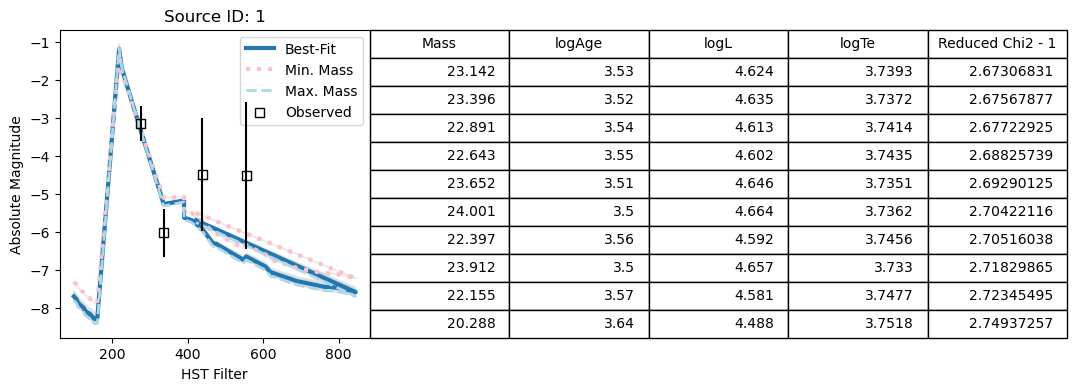

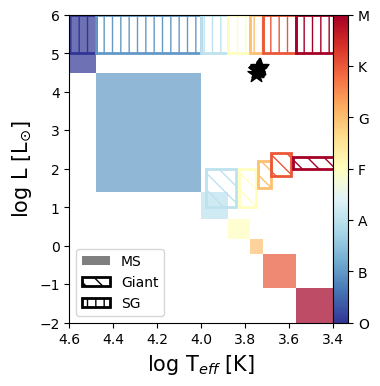

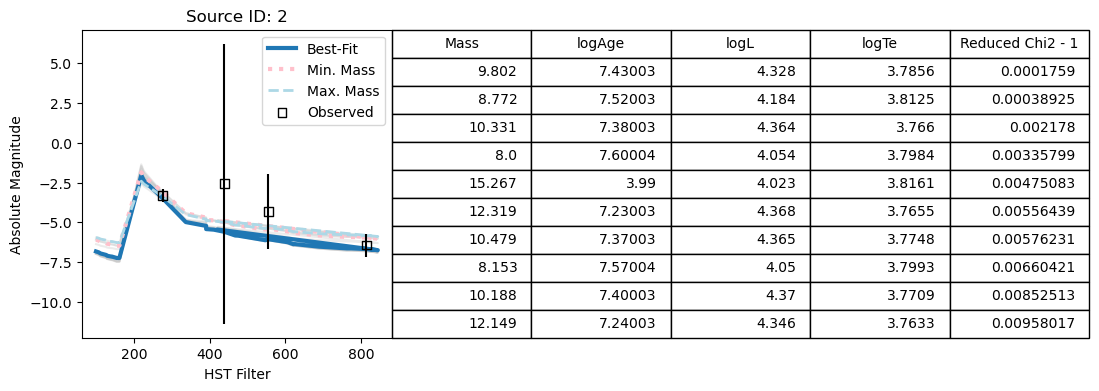

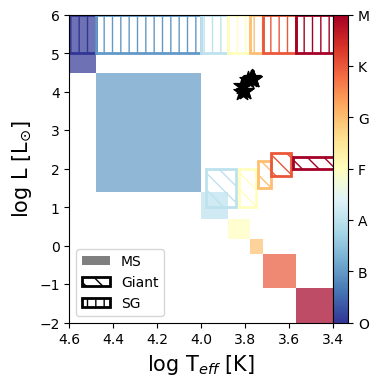

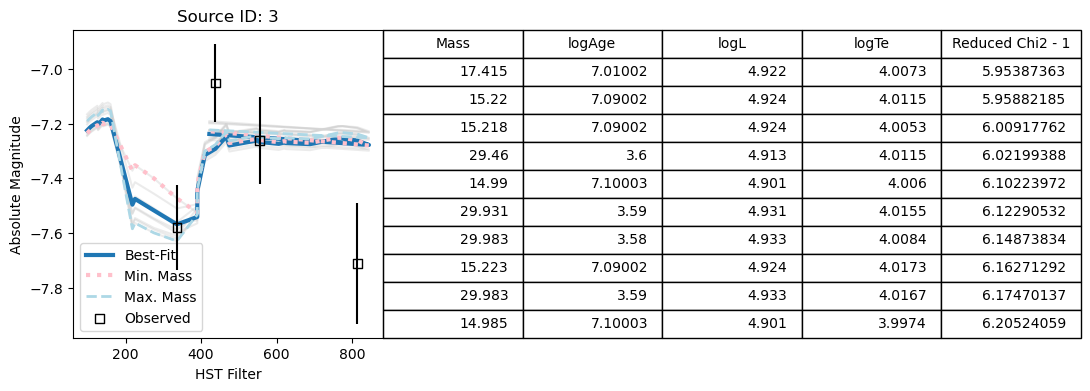

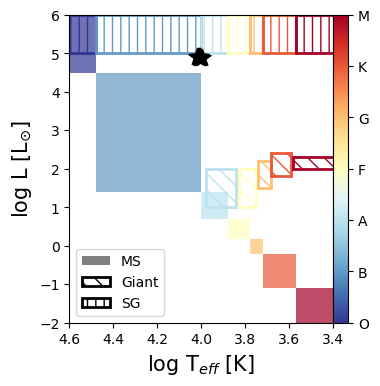

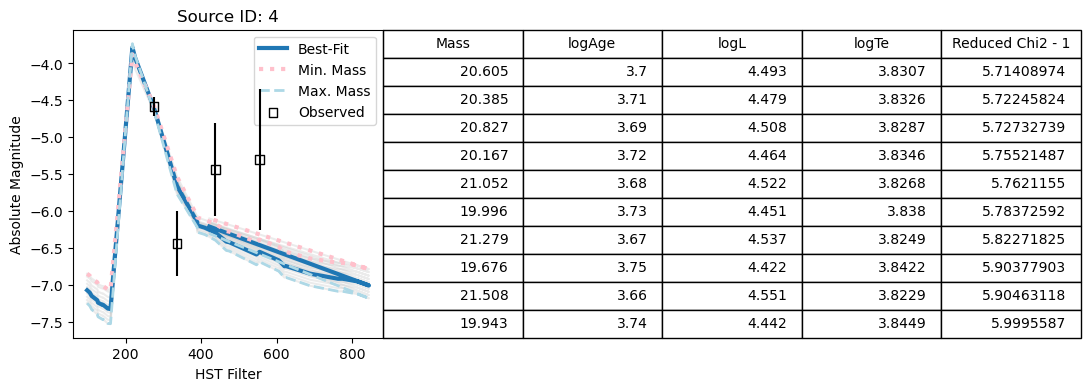

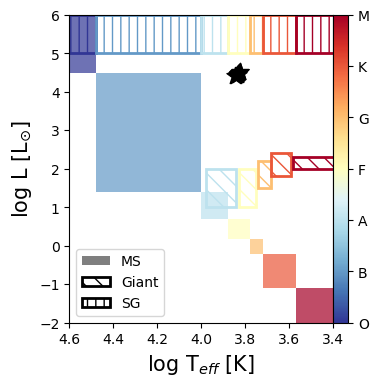

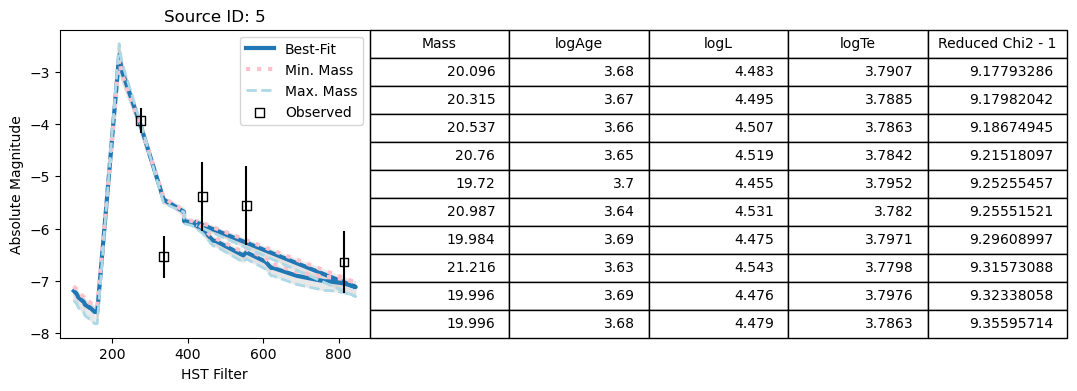

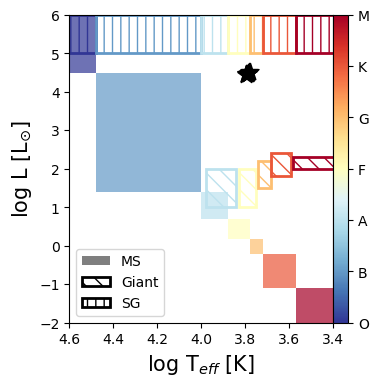

In [31]:
xrb_hst = Find(DaoCleanPhots, f'CSC ID = {cscid}')
xrb_hst.insert(2, 'ID', [i for i in range(1, 6)])
xrb_hst.to_csv(f'/Users/undergradstudent/Downloads/M66_HST_{cscid}.txt')
display(xrb_hst)

bestfit_hst = FitSED(df=xrb_hst,
                 instrument='wfc3',
                 idheader='ID',
                 min_models=10)
display(bestfit_hst)

PlotSED(df_sources=xrb_hst,
        df_models=bestfit_hst,
        idheader='ID',
        showHR=True)


## JWST

In [32]:
DaoCleanMatch = LoadSources(chandra_jwst_dir+'test/M66_daoclean_matches.frame')

dist = 10.1e6 # units pc from https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table
dmod = 5 * np.log10(dist) - 5
cd(jwstdir)
DaoCleanPhots = GetDaoPhots(DaoCleanMatch, 
                            photfiles=['photometry_M66_f200w_nircam_sources.ecsv',
                                       'photometry_M66_f300m_nircam_sources.ecsv',
                                       'photometry_M66_f335m_nircam_sources.ecsv',
                                       'photometry_M66_f360m_nircam_sources.ecsv'],
                            idheads=['F200W ID', 'F300M ID', 'F335M ID', 'F360M ID'],
                            filters=['F200W', 'F300M', 'F335M', 'F360M'],
                            magheader='aperture_mag_corr', dmod=dmod)

display(DaoCleanPhots)

Reading in sources from /Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/test/M66_daoclean_matches.frame...
Searching photometry_M66_f200w_nircam_sources.ecsv
Searching photometry_M66_f300m_nircam_sources.ecsv
Searching photometry_M66_f335m_nircam_sources.ecsv
Searching photometry_M66_f360m_nircam_sources.ecsv


RA        Dec  F200W ID  F300M ID  F335M ID  F360M ID  \
0     170.062403  12.991447    186126   43256.0   39563.0       NaN   
1     170.062377  12.991509    186591   43256.0       NaN   45349.0   
2     170.062923  12.991314    185199   42999.0   39292.0   44947.0   
3     170.062862  12.991339    185366   43115.0   39406.0   45067.0   
4     170.062923  12.991353    185433       NaN       NaN       NaN   
...          ...        ...       ...       ...       ...       ...   
1428  170.054172  12.960079     26276       NaN       NaN       NaN   
1429  170.054284  12.960093     26305       NaN       NaN       NaN   
1430  170.054191  12.960178     26519    6497.0    5610.0    6873.0   
1431  170.054263  12.960223     26624       NaN    5634.0    6902.0   
1432  170.066405  12.957754     20630       NaN       NaN       NaN   

                     CSC ID      F200W  F200W Err      F300M  F300M Err  \
0     2CXO J112014.9+125929 -15.333932  -0.104048 -16.364897  -0.029836   
1     2CXO J112014.9+125929 -15.246148  -0.112812 -16.364897  -0.029836   
2     2CXO J112015.0+125928 -13.942074  -0.296408 -15.186742  -0.088302   
3     2CXO J112015.0+125928 -14.427260  -0.200001 -15.646908  -0.057798   
4     2CXO J112015.0+125928 -14.000382  -0.286530        NaN        NaN   
...                     ...        ...        ...        ...        ...   
1428  2CXO J112013.0+125736  -8.724507  -0.421119        NaN        NaN   
1429  2CXO J112013.0+125736  -8.388021  -0.574976        NaN        NaN   
1430  2CXO J112013.0+125736  -9.815808  -0.154548  -9.026162  -0.743486   
1431  2CXO J112013.0+125736  -7.191804  -1.736334        NaN        NaN   
1432  2CXO J112015.9+125727  -9.264999  -0.158024        NaN        NaN   

          F335M  F335M Err      F360M  F360M Err  
0    -16.785937  -0.023996        NaN        NaN  
1           NaN        NaN -16.544547  -0.029958  
2    -15.453093  -0.081888 -15.436789  -0.083097  
3    -15.966454  -0.051037 -15.959080  -0.051366  
4           NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...  
1428        NaN        NaN        NaN        NaN  
1429        NaN        NaN        NaN        NaN  
1430  -9.570411  -0.670797  -9.565069  -0.606542  
1431  -9.110913  -1.022644  -9.409558  -0.700647  
1432        NaN        NaN        NaN        NaN  

[1433 rows x 15 columns]

This is the image in JWST


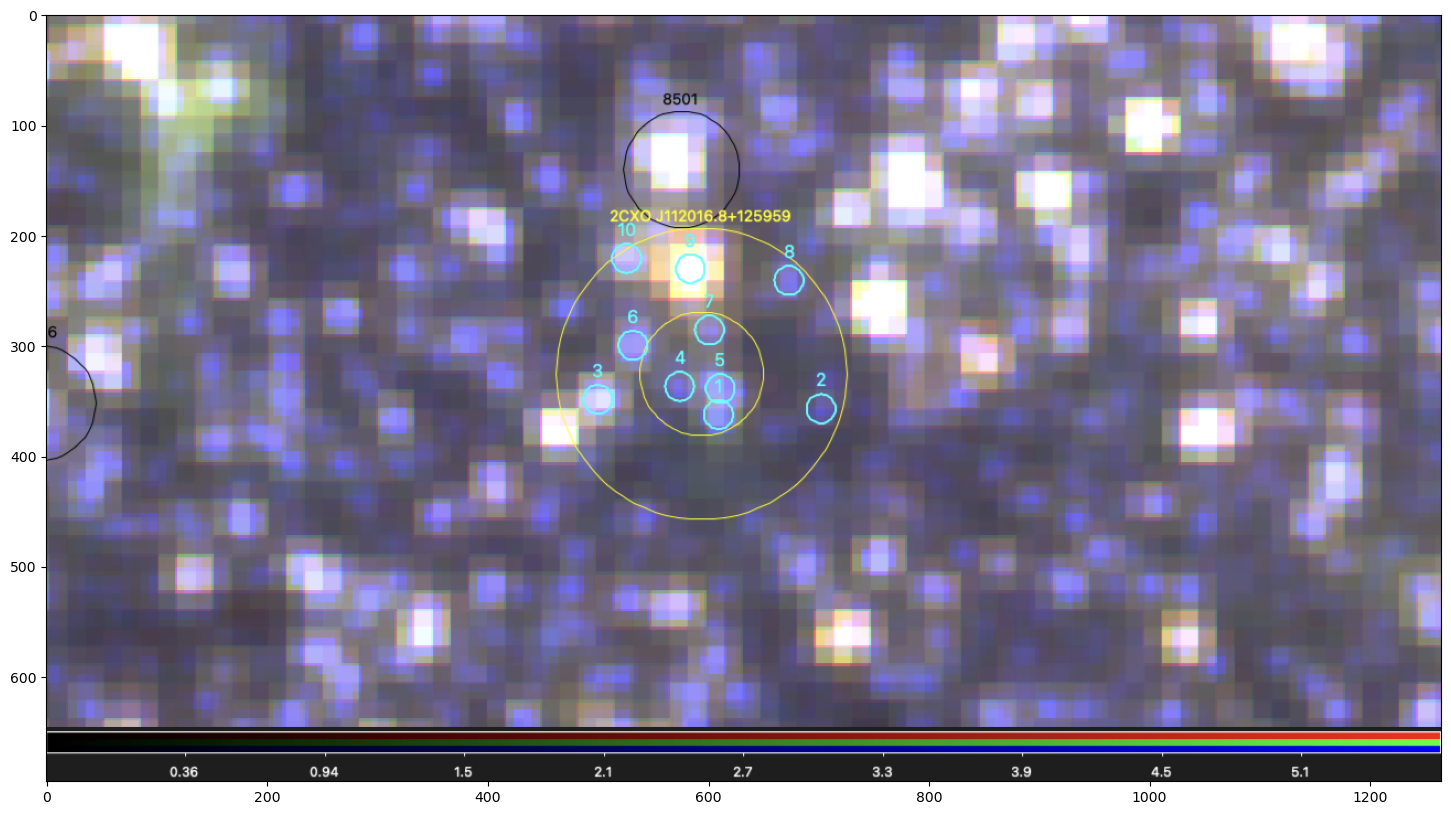

In [33]:
image2 = '/Users/undergradstudent/Downloads/source_in_jwst.png'
cscid = '2CXO J112016.8+125959'

print('This is the image in JWST')
plt.figure(figsize=(18, 15))
image2 = mpimg.imread(image2)
plt.imshow(image2)


plt.show()
cscid = '2CXO J112016.8+125959'

**Note**: Even though the label in the x-axis might say HST filter, JWST filters are being used. 

RA        Dec  ID  F200W ID  F300M ID  F335M ID  F360M ID  \
0  170.070131  12.999796   1    247821   56411.0   52210.0   59133.0   
1  170.070031  12.999801   2    247885       NaN       NaN       NaN   
2  170.070250  12.999810   3    247945   56343.0   52182.0   59102.0   
3  170.070170  12.999823   4    248001   56411.0   52210.0   59133.0   
4  170.070130  12.999821   5    248059   56411.0   52210.0   59133.0   
5  170.070216  12.999862   6    248309       NaN       NaN       NaN   
6  170.070140  12.999877   7    248449       NaN       NaN       NaN   
7  170.070062  12.999924   8    248735       NaN       NaN       NaN   
8  170.070159  12.999936   9    248853   56607.0   52391.0   59337.0   
9  170.070222  12.999946  10    248916       NaN       NaN       NaN   

                  CSC ID   F200Wmag  F200Wmag Err   F300Mmag  F300Mmag Err  \
0  2CXO J112016.8+125959  -9.741500     -0.256851  -9.153268     -0.929551   
1  2CXO J112016.8+125959  -7.438459     -2.149072        NaN           NaN   
2  2CXO J112016.8+125959 -10.528868     -0.123579 -10.510107     -0.264472   
3  2CXO J112016.8+125959  -9.081073     -0.471113  -9.153268     -0.929551   
4  2CXO J112016.8+125959  -9.996942     -0.203045  -9.153268     -0.929551   
5  2CXO J112016.8+125959  -9.957715     -0.209579        NaN           NaN   
6  2CXO J112016.8+125959  -8.492008     -0.811660        NaN           NaN   
7  2CXO J112016.8+125959  -8.885451     -0.566544        NaN           NaN   
8  2CXO J112016.8+125959 -10.299440     -0.153425 -10.951326     -0.177348   
9  2CXO J112016.8+125959 -10.043809     -0.193394        NaN           NaN   

    F335Mmag  F335Mmag Err   F360Mmag  F360Mmag Err  
0  -9.342115     -1.031260  -8.989539     -1.337640  
1        NaN           NaN        NaN           NaN  
2 -10.535984     -0.338737 -10.438706     -0.347512  
3  -9.342115     -1.031260  -8.989539     -1.337640  
4  -9.342115     -1.031260  -8.989539     -1.337640  
5        NaN           NaN        NaN           NaN  
6        NaN           NaN        NaN           NaN  
7        NaN           NaN        NaN           NaN  
8 -11.254468     -0.177578 -11.443417     -0.139619  
9        NaN           NaN        NaN           NaN

Finding best-fit model(s)...
DONE


Zini       MH   logAge       Mini   int_IMF    Mass   logL   logTe  \
0   0.0152  0.01508  6.64500  45.092602  2.632799  29.286  5.769  3.9764   
1   0.0152  0.01508  6.65400  43.683998  2.632751  29.909  5.746  3.9350   
2   0.0152  0.01508  6.78000  32.132000  2.632168  20.337  5.561  3.8976   
3   0.0152  0.01508  6.92399  21.055595  2.630872  20.440  5.078  3.7378   
4   0.0152  0.01508  6.92399  21.056017  2.630872  20.440  5.066  3.7179   
..     ...      ...      ...        ...       ...     ...    ...     ...   
70  0.0152  0.01508  7.32899  11.250463  2.627014  11.252  4.808  3.5346   
71  0.0152  0.01508  7.88697   5.932109  2.618026   5.607  4.587  3.4893   
72  0.0152  0.01508  7.88697   5.932140  2.618026   5.578  4.594  3.4878   
73  0.0152  0.01508  7.88697   5.932208  2.618027   5.495  4.618  3.4831   
74  0.0152  0.01508  7.91397   5.773734  2.617457   5.509  4.592  3.4866   

     logg label  ...  F300Mmag  F335Mmag  F360Mmag  F410Mmag  F430Mmag  \
0   0.993     1  ...    -9.537    -9.534    -9.534    -9.538    -9.538   
1   0.860     1  ...    -9.781    -9.780    -9.781    -9.788    -9.789   
2   0.728     3  ...    -9.586    -9.587    -9.590    -9.600    -9.602   
3   0.574     1  ...    -9.649    -9.656    -9.661    -9.669    -9.659   
4   0.506     1  ...    -9.769    -9.778    -9.783    -9.790    -9.773   
..    ...   ...  ...       ...       ...       ...       ...       ...   
70 -0.229     7  ...   -10.364   -10.434   -10.454   -10.404   -10.327   
71 -0.491     8  ...   -10.440   -10.727   -10.820   -10.920   -10.894   
72 -0.506     8  ...   -10.482   -10.786   -10.884   -10.993   -10.970   
73 -0.556     8  ...   -10.625   -10.983   -11.100   -11.237   -11.223   
74 -0.514     8  ...   -10.474   -10.783   -10.883   -10.990   -10.966   

    F460Mmag  F480Mmag Reduced Chi2  Reduced Chi2 - 1  ID  
0     -9.539    -9.536     1.004621          0.004621   1  
1     -9.791    -9.788     0.995523          0.004477   1  
2     -9.605    -9.603     0.996201          0.003799   1  
3     -9.628    -9.633     1.000284          0.000284   1  
4     -9.712    -9.722     0.991752          0.008248   1  
..       ...       ...          ...               ...  ..  
70   -10.210   -10.258     0.997907          0.002093  10  
71   -10.838   -10.940     1.004300          0.004300  10  
72   -10.916   -11.020     1.004300          0.004300  10  
73   -11.175   -11.286     1.004300          0.004300  10  
74   -10.912   -11.015     1.004300          0.004300  10  

[75 rows x 53 columns]

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


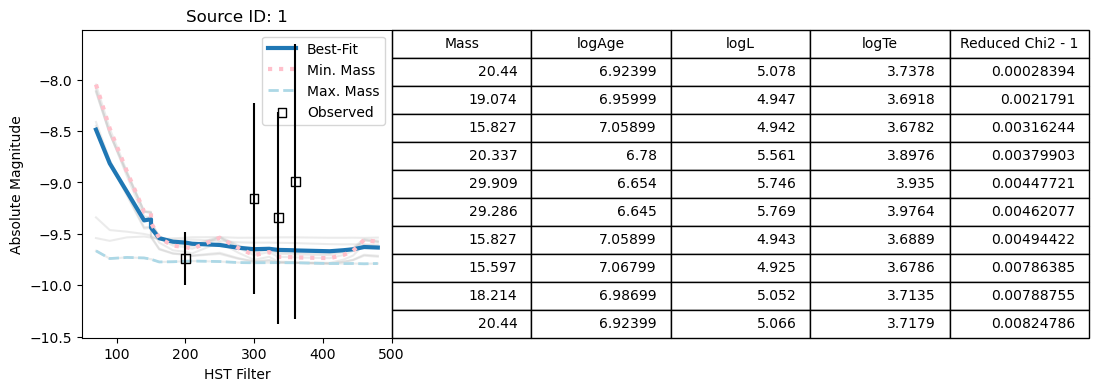

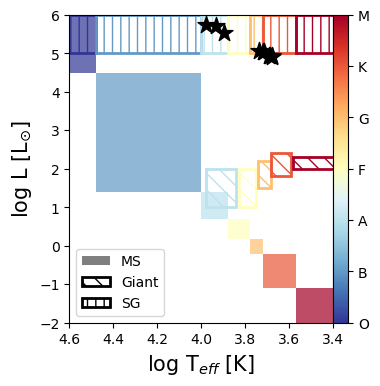

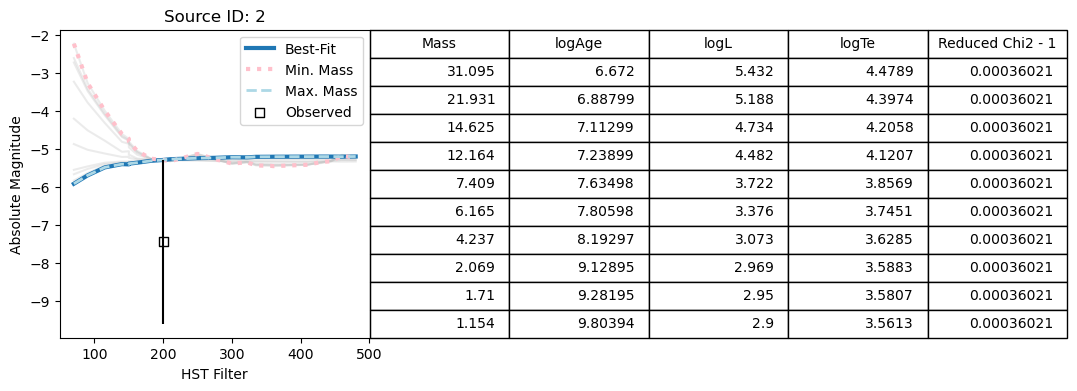

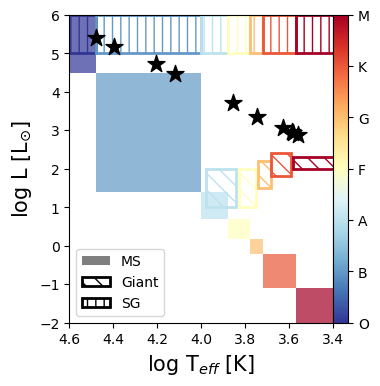

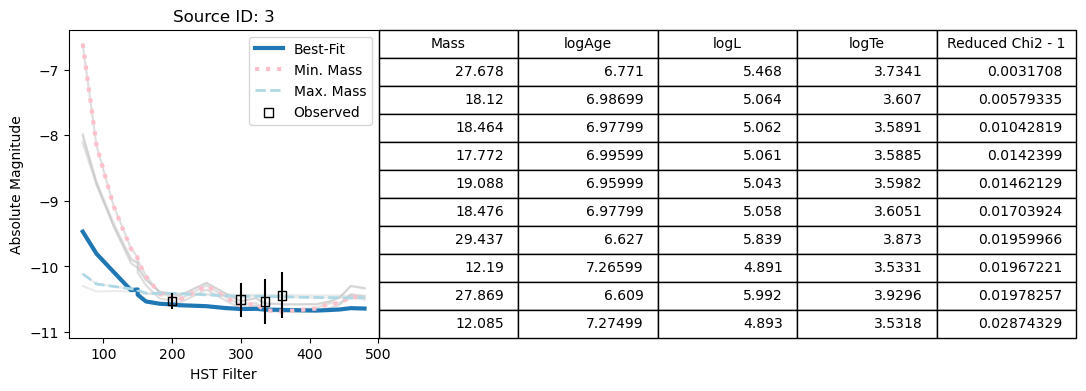

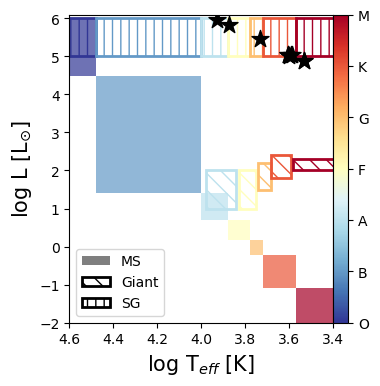

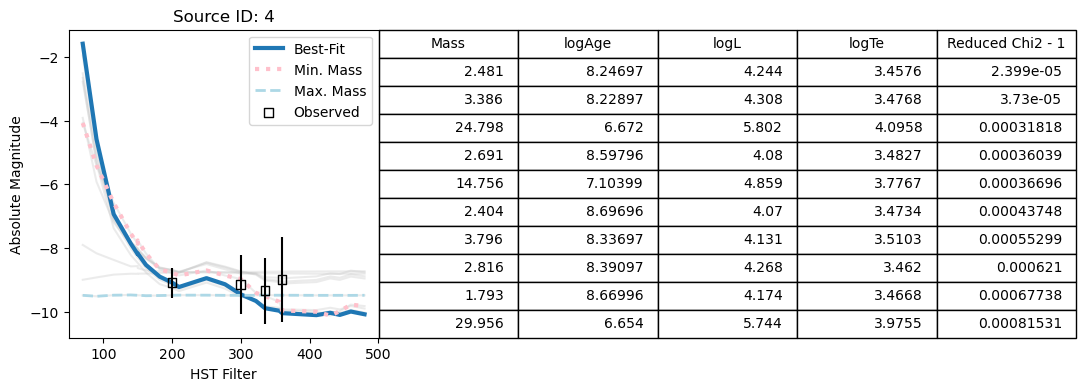

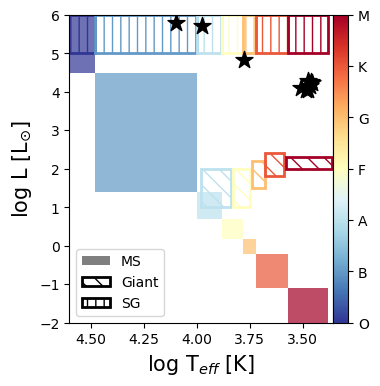

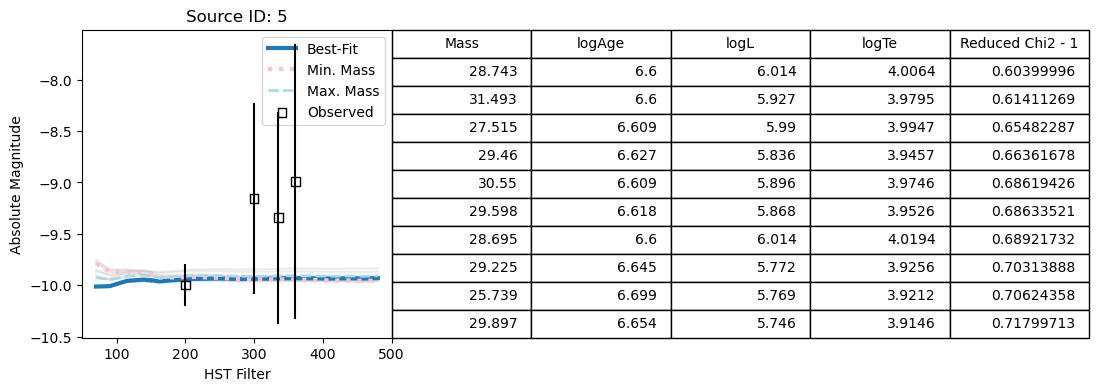

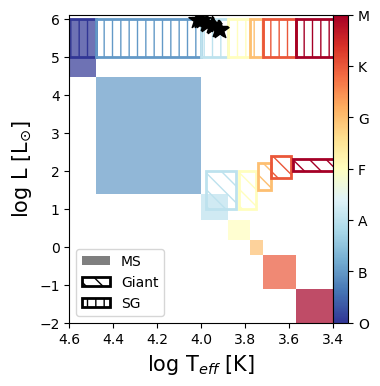

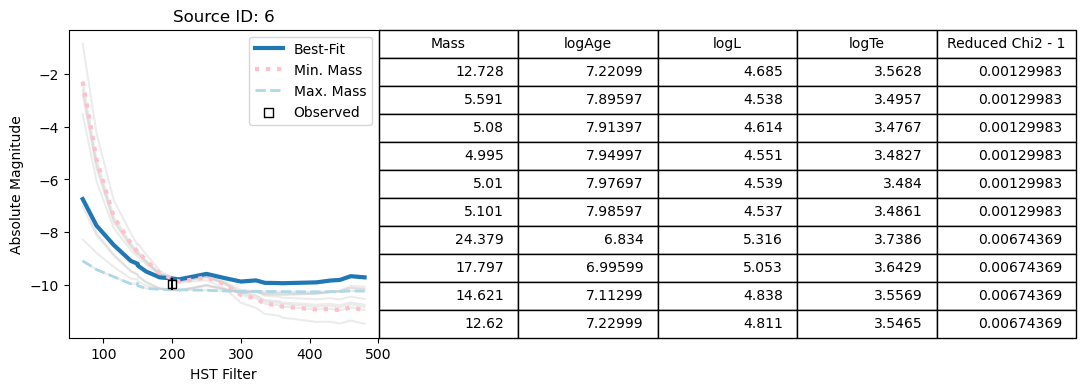

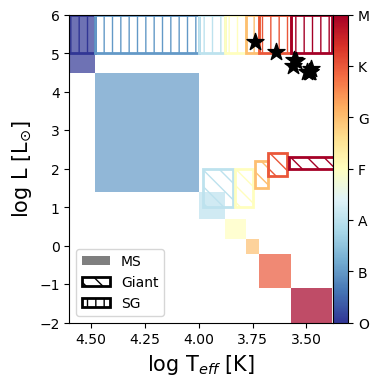

No best-fit model available for Source ID 7.


ValueError: max() iterable argument is empty

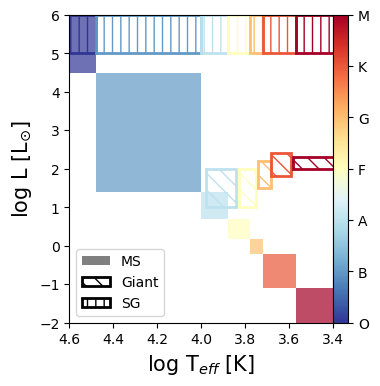

In [34]:
xrb_jwst = Find(DaoCleanPhots, f'CSC ID = {cscid}')
xrb_jwst.insert(2, 'ID', [i for i in range(1, len(xrb_jwst)+1)])
xrb_jwst.to_csv(f'/Users/undergradstudent/Downloads/M66_JWST_{cscid}.txt')

# Rename headers to make the df compatible with the CMD data models 
xrb_jwst = xrb_jwst.rename(columns={'F200W': 'F200Wmag',
                                    'F300M': 'F300Mmag',
                                    'F335M': 'F335Mmag',
                                    'F360M': 'F360Mmag',
                                    'F200W Err': 'F200Wmag Err',
                                    'F300M Err': 'F300Mmag Err',
                                    'F335M Err': 'F335Mmag Err',
                                    'F360M Err': 'F360Mmag Err'})
display(xrb_jwst)

bestfit_jwst = FitSED(df=xrb_jwst,
                 instrument='nircam',
                 idheader='ID',
                 min_models=10,
                 input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')
display(bestfit_jwst)

# The code did not create best fit models for source id 7 and 8.
# The SED plots for source id 9 and 10 are in the cell afterwards
PlotSED(df_sources=xrb_jwst, df_models=bestfit_jwst, idheader='ID', showHR=True)

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


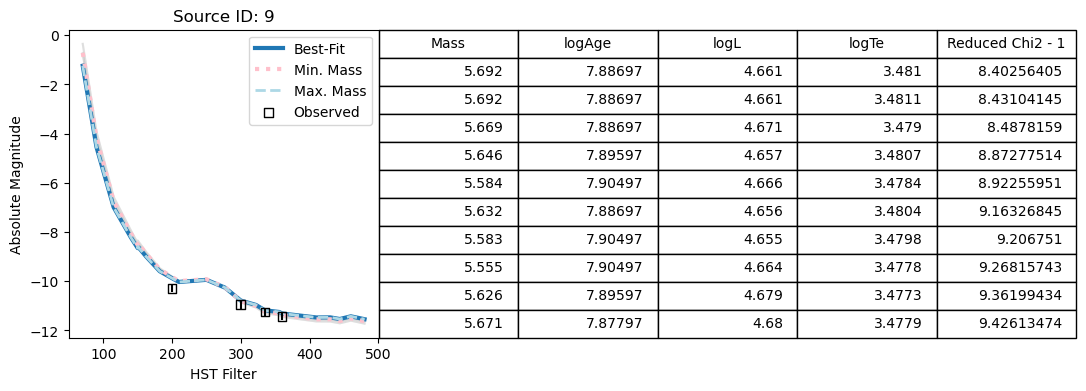

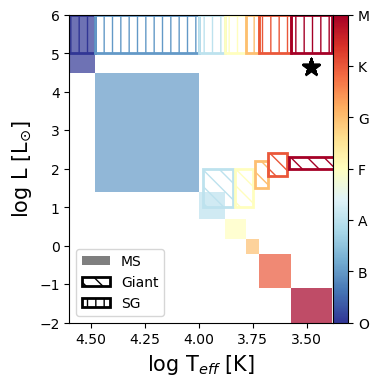

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


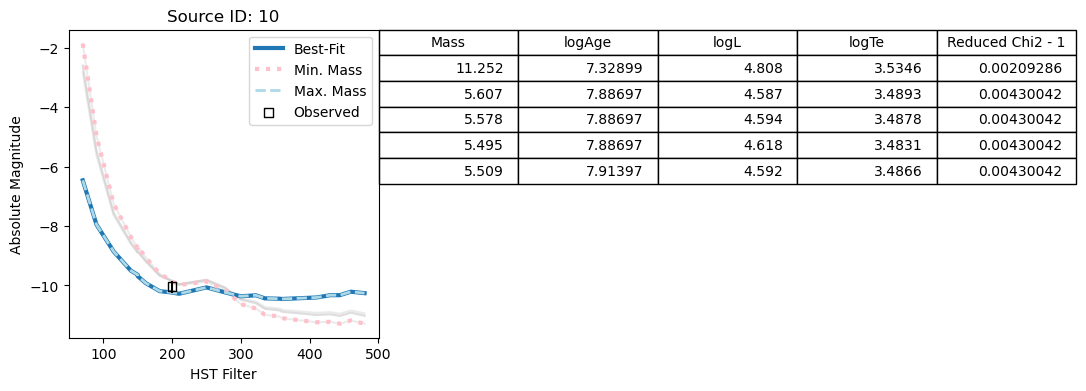

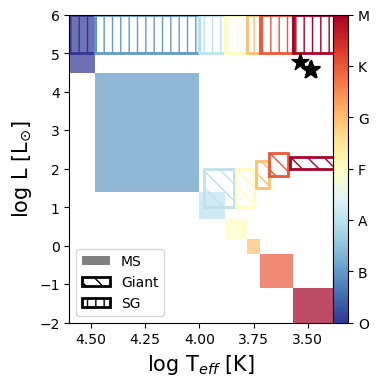

In [35]:
PlotSED(df_sources=Find(xrb_jwst, ['ID = 9']), df_models=Find(bestfit_jwst, ['ID = 9']), idheader='ID', showHR=True)
PlotSED(df_sources=Find(xrb_jwst, ['ID = 10']), df_models=Find(bestfit_jwst, ['ID = 10']), idheader='ID', showHR=True)

# JWST vs HST

Text(0.5, 1.0, 'JWST')

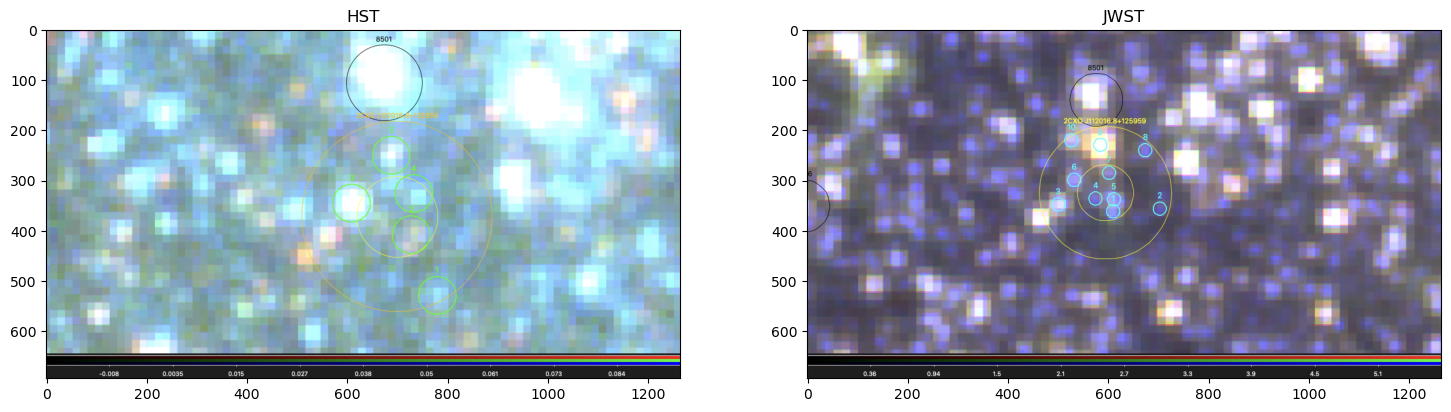

In [36]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 15))
ax[0].imshow(image1)
ax[0].set_title('HST')
ax[1].imshow(image2)
ax[1].set_title('JWST')
# Black region is a cluster

In [ ]:
# Looking at souce id 5 in HST and source id 9 in JWST
print("this is source 5 in HST")
PlotSED(df_sources=Find(xrb_hst, ['ID = 5']), df_models=Find(bestfit_hst, ['ID = 5']), idheader='ID', showHR=True)
print("This is source 9 in JWST")
PlotSED(df_sources=Find(xrb_jwst, ['ID = 9']), df_models=Find(bestfit_jwst, ['ID = 9']), idheader='ID', showHR=True)

this is source 3 in HST
[98, 105, 110, 125, 127, 139, 140, 153, 160, 218, 225, 275, 336, 390, 390, 410, 438, 467, 475, 547, 555, 606, 621, 625, 689, 763, 775, 814, 845, 422]
[275, 336, 438, 555, 814]


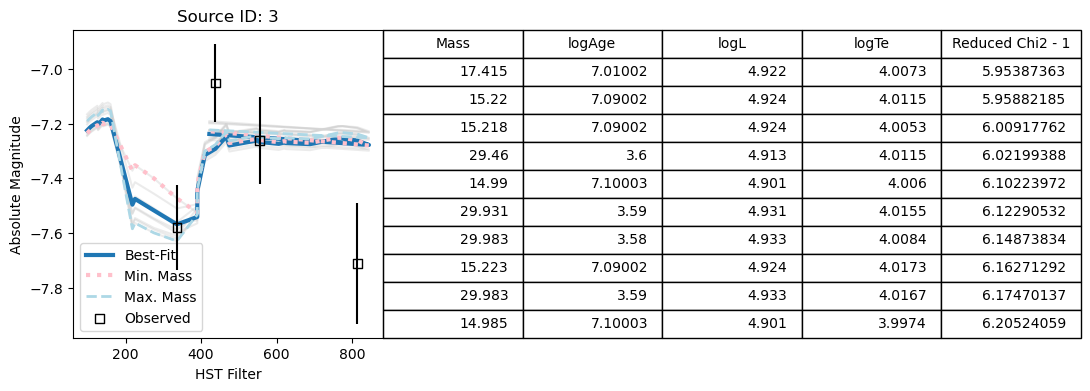

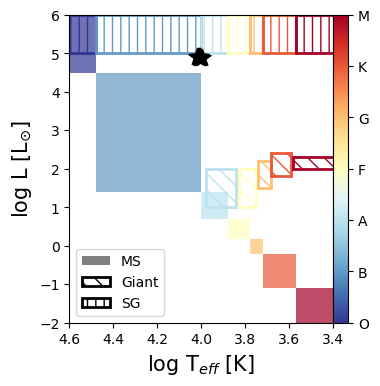

This is source 6 in JWST
[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


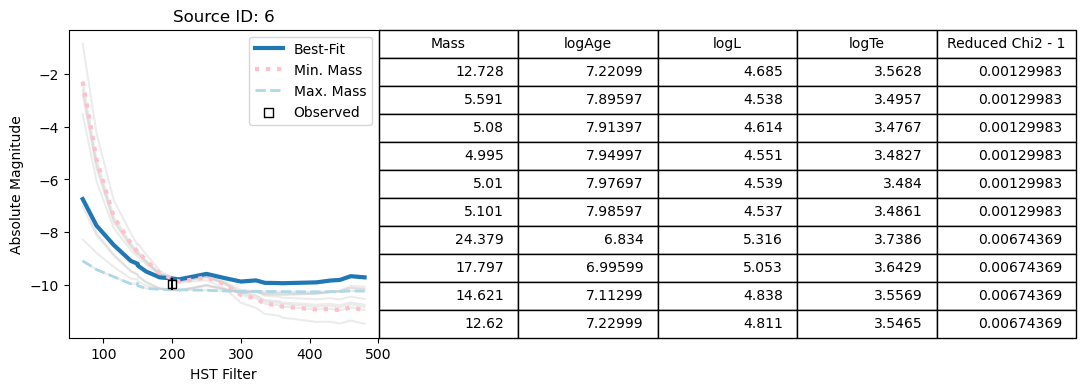

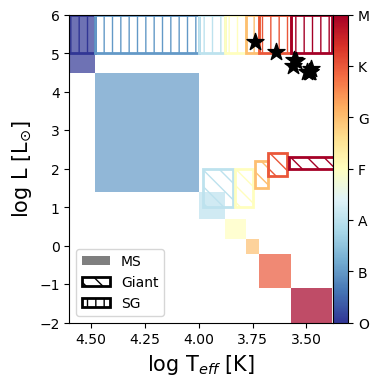

In [37]:
# Looking at souce id 3 in HST and source id 6 in JWST
print("this is source 3 in HST")
PlotSED(df_sources=Find(xrb_hst, ['ID = 3']), df_models=Find(bestfit_hst, ['ID = 3']), idheader='ID', showHR=True)
print("This is source 6 in JWST")
PlotSED(df_sources=Find(xrb_jwst, ['ID = 6']), df_models=Find(bestfit_jwst, ['ID = 6']), idheader='ID', showHR=True)

this is source 2 in HST
[98, 105, 110, 125, 127, 139, 140, 153, 160, 218, 225, 275, 336, 390, 390, 410, 438, 467, 475, 547, 555, 606, 621, 625, 689, 763, 775, 814, 845, 422]
[275, 336, 438, 555, 814]


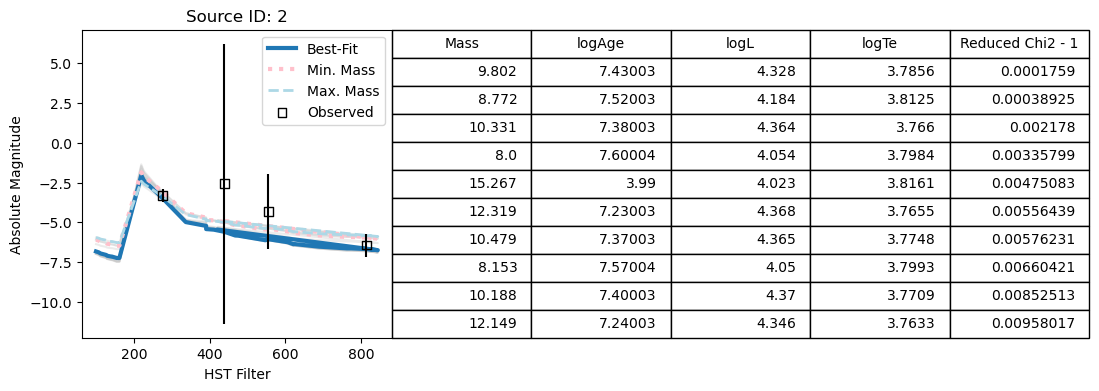

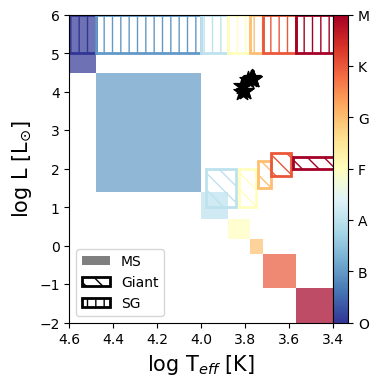

This is source 1 in JWST
[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


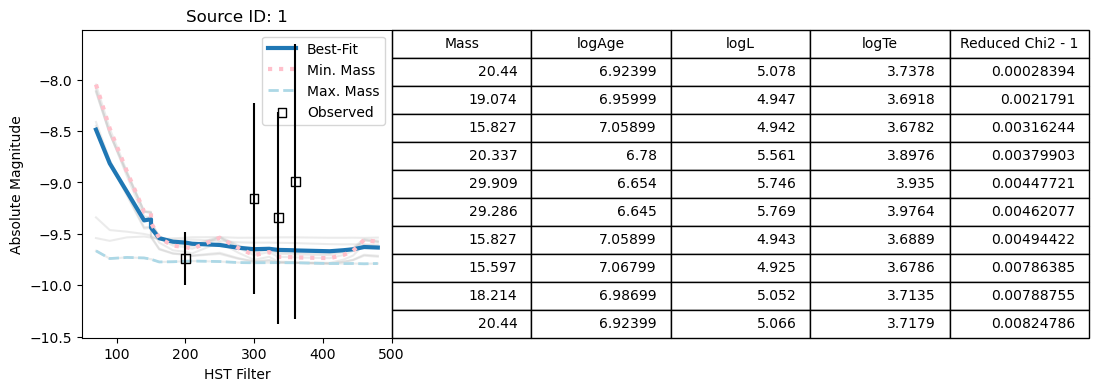

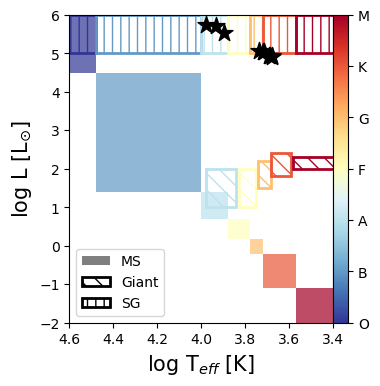

This is source 5 in JWST
[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


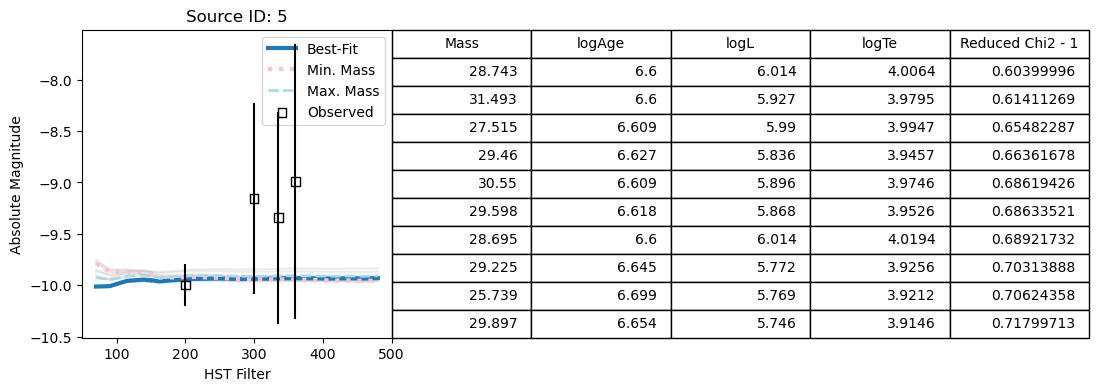

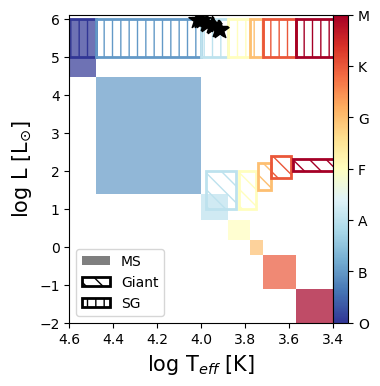

In [38]:
# Looking at souce id 2 in HST and source ids 1 and 5 in JWST
print("this is source 2 in HST")
PlotSED(df_sources=Find(xrb_hst, ['ID = 2']), df_models=Find(bestfit_hst, ['ID = 2']), idheader='ID', showHR=True)
print("This is source 1 in JWST")
PlotSED(df_sources=Find(xrb_jwst, ['ID = 1']), df_models=Find(bestfit_jwst, ['ID = 1']), idheader='ID', showHR=True)
print("This is source 5 in JWST")
PlotSED(df_sources=Find(xrb_jwst, ['ID = 5']), df_models=Find(bestfit_jwst, ['ID = 5']), idheader='ID', showHR=True)

# Some more testing

In [41]:
display(Find(bestfit_jwst, ['ID = 6']))

display(Find(bestfit_jwst, ['ID = 7']))

display(Find(bestfit_jwst, ['ID = 8']))

Zini       MH   logAge       Mini   int_IMF    Mass   logL   logTe  \
0  0.0152  0.01508  6.83400  25.815073  2.631586  24.379  5.316  3.7386   
1  0.0152  0.01508  6.99599  19.281084  2.630501  17.797  5.053  3.6429   
2  0.0152  0.01508  7.11299  14.851143  2.629112  14.621  4.838  3.5569   
3  0.0152  0.01508  7.22099  13.137134  2.628278  12.728  4.685  3.5628   
4  0.0152  0.01508  7.22999  12.968968  2.628182  12.620  4.811  3.5465   
5  0.0152  0.01508  7.89597   5.878422  2.617837   5.591  4.538  3.4957   
6  0.0152  0.01508  7.91397   5.774074  2.617458   5.080  4.614  3.4767   
7  0.0152  0.01508  7.94997   5.576708  2.616696   4.995  4.551  3.4827   
8  0.0152  0.01508  7.97697   5.432995  2.616100   5.010  4.539  3.4840   
9  0.0152  0.01508  7.98597   5.386043  2.615898   5.101  4.537  3.4861   

    logg label  ...  F300Mmag  F335Mmag  F360Mmag  F410Mmag  F430Mmag  \
0  0.416     1  ...   -10.235   -10.243   -10.248   -10.257   -10.250   
1  0.159     3  ...   -10.269   -10.296   -10.305   -10.313   -10.277   
2 -0.055     1  ...   -10.290   -10.344   -10.359   -10.323   -10.254   
3  0.061     6  ...    -9.866    -9.915    -9.930    -9.897    -9.829   
4 -0.134     7  ...   -10.293   -10.353   -10.371   -10.328   -10.255   
5 -0.418     8  ...   -10.179   -10.403   -10.475   -10.537   -10.499   
6 -0.611     8  ...   -10.668   -11.091   -11.230   -11.393   -11.386   
7 -0.531     8  ...   -10.375   -10.708   -10.816   -10.923   -10.896   
8 -0.514     8  ...   -10.309   -10.622   -10.723   -10.817   -10.784   
9 -0.495     8  ...   -10.273   -10.565   -10.659   -10.744   -10.709   

   F460Mmag  F480Mmag Reduced Chi2  Reduced Chi2 - 1  ID  
0   -10.224   -10.229     1.006744          0.006744   6  
1   -10.031   -10.064     1.006744          0.006744   6  
2   -10.098   -10.143     1.006744          0.006744   6  
3    -9.663    -9.707     1.001300          0.001300   6  
4   -10.117   -10.164     1.006744          0.006744   6  
5   -10.438   -10.527     1.001300          0.001300   6  
6   -11.346   -11.463     1.001300          0.001300   6  
7   -10.844   -10.948     1.001300          0.001300   6  
8   -10.730   -10.831     1.001300          0.001300   6  
9   -10.652   -10.751     1.001300          0.001300   6  

[10 rows x 53 columns]

Empty DataFrame
Columns: [Zini, MH, logAge, Mini, int_IMF, Mass, logL, logTe, logg, label, McoreTP, C_O, period0, period1, period2, period3, period4, pmode, Mloss, tau1m, X, Y, Xc, Xn, Xo, Cexcess, Z, mbolmag, F070Wmag, F090Wmag, F115Wmag, F150Wmag, F200Wmag, F277Wmag, F356Wmag, F444Wmag, F150W2mag, F322W2mag, F140Mmag, F162Mmag, F182Mmag, F210Mmag, F250Mmag, F300Mmag, F335Mmag, F360Mmag, F410Mmag, F430Mmag, F460Mmag, F480Mmag, Reduced Chi2, Reduced Chi2 - 1, ID]
Index: []

[0 rows x 53 columns]

Empty DataFrame
Columns: [Zini, MH, logAge, Mini, int_IMF, Mass, logL, logTe, logg, label, McoreTP, C_O, period0, period1, period2, period3, period4, pmode, Mloss, tau1m, X, Y, Xc, Xn, Xo, Cexcess, Z, mbolmag, F070Wmag, F090Wmag, F115Wmag, F150Wmag, F200Wmag, F277Wmag, F356Wmag, F444Wmag, F150W2mag, F322W2mag, F140Mmag, F162Mmag, F182Mmag, F210Mmag, F250Mmag, F300Mmag, F335Mmag, F360Mmag, F410Mmag, F430Mmag, F460Mmag, F480Mmag, Reduced Chi2, Reduced Chi2 - 1, ID]
Index: []

[0 rows x 53 columns]

In [49]:
bestfit6 = FitSED(df=Find(xrb_jwst, ['ID = 6']), instrument='nircam', idheader='ID', min_models=10, 
       input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')

display(bestfit6)

bestfit7 = FitSED(df=Find(xrb_jwst, ['ID = 7']), instrument='nircam', idheader='ID', min_models=10, 
       input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')

display(bestfit7)

bestfit8 = FitSED(df=Find(xrb_jwst, ['ID = 8']), instrument='nircam', idheader='ID', min_models=10, 
       input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')

display(bestfit8)

Finding best-fit model(s)...
DONE


Zini       MH   logAge       Mini   int_IMF    Mass   logL   logTe  \
0  0.0152  0.01508  6.83400  25.815073  2.631586  24.379  5.316  3.7386   
1  0.0152  0.01508  6.99599  19.281084  2.630501  17.797  5.053  3.6429   
2  0.0152  0.01508  7.11299  14.851143  2.629112  14.621  4.838  3.5569   
3  0.0152  0.01508  7.22099  13.137134  2.628278  12.728  4.685  3.5628   
4  0.0152  0.01508  7.22999  12.968968  2.628182  12.620  4.811  3.5465   
5  0.0152  0.01508  7.89597   5.878422  2.617837   5.591  4.538  3.4957   
6  0.0152  0.01508  7.91397   5.774074  2.617458   5.080  4.614  3.4767   
7  0.0152  0.01508  7.94997   5.576708  2.616696   4.995  4.551  3.4827   
8  0.0152  0.01508  7.97697   5.432995  2.616100   5.010  4.539  3.4840   
9  0.0152  0.01508  7.98597   5.386043  2.615898   5.101  4.537  3.4861   

    logg label  ...  F300Mmag  F335Mmag  F360Mmag  F410Mmag  F430Mmag  \
0  0.416     1  ...   -10.235   -10.243   -10.248   -10.257   -10.250   
1  0.159     3  ...   -10.269   -10.296   -10.305   -10.313   -10.277   
2 -0.055     1  ...   -10.290   -10.344   -10.359   -10.323   -10.254   
3  0.061     6  ...    -9.866    -9.915    -9.930    -9.897    -9.829   
4 -0.134     7  ...   -10.293   -10.353   -10.371   -10.328   -10.255   
5 -0.418     8  ...   -10.179   -10.403   -10.475   -10.537   -10.499   
6 -0.611     8  ...   -10.668   -11.091   -11.230   -11.393   -11.386   
7 -0.531     8  ...   -10.375   -10.708   -10.816   -10.923   -10.896   
8 -0.514     8  ...   -10.309   -10.622   -10.723   -10.817   -10.784   
9 -0.495     8  ...   -10.273   -10.565   -10.659   -10.744   -10.709   

   F460Mmag  F480Mmag Reduced Chi2  Reduced Chi2 - 1  ID  
0   -10.224   -10.229     1.006744          0.006744   6  
1   -10.031   -10.064     1.006744          0.006744   6  
2   -10.098   -10.143     1.006744          0.006744   6  
3    -9.663    -9.707     1.001300          0.001300   6  
4   -10.117   -10.164     1.006744          0.006744   6  
5   -10.438   -10.527     1.001300          0.001300   6  
6   -11.346   -11.463     1.001300          0.001300   6  
7   -10.844   -10.948     1.001300          0.001300   6  
8   -10.730   -10.831     1.001300          0.001300   6  
9   -10.652   -10.751     1.001300          0.001300   6  

[10 rows x 53 columns]

Finding best-fit model(s)...
DONE


Empty DataFrame
Columns: [Zini, MH, logAge, Mini, int_IMF, Mass, logL, logTe, logg, label, McoreTP, C_O, period0, period1, period2, period3, period4, pmode, Mloss, tau1m, X, Y, Xc, Xn, Xo, Cexcess, Z, mbolmag, F070Wmag, F090Wmag, F115Wmag, F150Wmag, F200Wmag, F277Wmag, F356Wmag, F444Wmag, F150W2mag, F322W2mag, F140Mmag, F162Mmag, F182Mmag, F210Mmag, F250Mmag, F300Mmag, F335Mmag, F360Mmag, F410Mmag, F430Mmag, F460Mmag, F480Mmag, Reduced Chi2, Reduced Chi2 - 1, ID]
Index: []

[0 rows x 53 columns]

Finding best-fit model(s)...
DONE


Empty DataFrame
Columns: [Zini, MH, logAge, Mini, int_IMF, Mass, logL, logTe, logg, label, McoreTP, C_O, period0, period1, period2, period3, period4, pmode, Mloss, tau1m, X, Y, Xc, Xn, Xo, Cexcess, Z, mbolmag, F070Wmag, F090Wmag, F115Wmag, F150Wmag, F200Wmag, F277Wmag, F356Wmag, F444Wmag, F150W2mag, F322W2mag, F140Mmag, F162Mmag, F182Mmag, F210Mmag, F250Mmag, F300Mmag, F335Mmag, F360Mmag, F410Mmag, F430Mmag, F460Mmag, F480Mmag, Reduced Chi2, Reduced Chi2 - 1, ID]
Index: []

[0 rows x 53 columns]

In [53]:
display(Find(xrb_jwst, 'ID = 6'))
bestfit6 = FitSED(df=Find(xrb_jwst, ['ID = 6']), instrument='nircam', idheader='ID', min_models=10, 
       input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')

display(bestfit6)

RA        Dec  ID  F200W ID  F300M ID  F335M ID  F360M ID  \
0  170.070216  12.999862   6    248309       NaN       NaN       NaN   

                  CSC ID  F200Wmag  F200Wmag Err  F300Mmag  F300Mmag Err  \
0  2CXO J112016.8+125959 -9.957715     -0.209579       NaN           NaN   

   F335Mmag  F335Mmag Err  F360Mmag  F360Mmag Err  
0       NaN           NaN       NaN           NaN

Finding best-fit model(s)...
DONE


Zini       MH   logAge       Mini   int_IMF    Mass   logL   logTe  \
0  0.0152  0.01508  6.83400  25.815073  2.631586  24.379  5.316  3.7386   
1  0.0152  0.01508  6.99599  19.281084  2.630501  17.797  5.053  3.6429   
2  0.0152  0.01508  7.11299  14.851143  2.629112  14.621  4.838  3.5569   
3  0.0152  0.01508  7.22099  13.137134  2.628278  12.728  4.685  3.5628   
4  0.0152  0.01508  7.22999  12.968968  2.628182  12.620  4.811  3.5465   
5  0.0152  0.01508  7.89597   5.878422  2.617837   5.591  4.538  3.4957   
6  0.0152  0.01508  7.91397   5.774074  2.617458   5.080  4.614  3.4767   
7  0.0152  0.01508  7.94997   5.576708  2.616696   4.995  4.551  3.4827   
8  0.0152  0.01508  7.97697   5.432995  2.616100   5.010  4.539  3.4840   
9  0.0152  0.01508  7.98597   5.386043  2.615898   5.101  4.537  3.4861   

    logg label  ...  F300Mmag  F335Mmag  F360Mmag  F410Mmag  F430Mmag  \
0  0.416     1  ...   -10.235   -10.243   -10.248   -10.257   -10.250   
1  0.159     3  ...   -10.269   -10.296   -10.305   -10.313   -10.277   
2 -0.055     1  ...   -10.290   -10.344   -10.359   -10.323   -10.254   
3  0.061     6  ...    -9.866    -9.915    -9.930    -9.897    -9.829   
4 -0.134     7  ...   -10.293   -10.353   -10.371   -10.328   -10.255   
5 -0.418     8  ...   -10.179   -10.403   -10.475   -10.537   -10.499   
6 -0.611     8  ...   -10.668   -11.091   -11.230   -11.393   -11.386   
7 -0.531     8  ...   -10.375   -10.708   -10.816   -10.923   -10.896   
8 -0.514     8  ...   -10.309   -10.622   -10.723   -10.817   -10.784   
9 -0.495     8  ...   -10.273   -10.565   -10.659   -10.744   -10.709   

   F460Mmag  F480Mmag Reduced Chi2  Reduced Chi2 - 1  ID  
0   -10.224   -10.229     1.006744          0.006744   6  
1   -10.031   -10.064     1.006744          0.006744   6  
2   -10.098   -10.143     1.006744          0.006744   6  
3    -9.663    -9.707     1.001300          0.001300   6  
4   -10.117   -10.164     1.006744          0.006744   6  
5   -10.438   -10.527     1.001300          0.001300   6  
6   -11.346   -11.463     1.001300          0.001300   6  
7   -10.844   -10.948     1.001300          0.001300   6  
8   -10.730   -10.831     1.001300          0.001300   6  
9   -10.652   -10.751     1.001300          0.001300   6  

[10 rows x 53 columns]

RA        Dec  ID  F200W ID  F300M ID  F335M ID  F360M ID  \
0  170.07014  12.999877   7    248449       NaN       NaN       NaN   

                  CSC ID  F200Wmag  F200Wmag Err  F300Mmag  F300Mmag Err  \
0  2CXO J112016.8+125959 -8.492008      -0.81166       NaN           NaN   

   F335Mmag  F335Mmag Err  F360Mmag  F360Mmag Err  
0       NaN           NaN       NaN           NaN

Finding best-fit model(s)...
DONE


Zini       MH   logAge       Mini   int_IMF    Mass   logL   logTe  \
0   0.0152  0.01508  6.69000  38.625362  2.632545  31.756  5.643  3.9646   
1   0.0152  0.01508  6.69900  37.534294  2.632492  31.502  5.628  3.9594   
2   0.0152  0.01508  7.24799  12.589181  2.627955  12.388  4.574  3.5886   
3   0.0152  0.01508  7.25699  12.421862  2.627850  12.278  4.556  3.5816   
4   0.0152  0.01508  7.88697   5.932677  2.618028   4.489  4.633  3.4651   
5   0.0152  0.01508  7.99497   5.340036  2.615696   5.137  4.375  3.5093   
6   0.0152  0.01508  8.06697   4.990554  2.614018   4.785  4.363  3.5034   
7   0.0152  0.01508  8.12097   4.747691  2.612683   4.499  4.354  3.4982   
8   0.0152  0.01508  8.12097   4.747696  2.612683   4.496  4.354  3.4982   
9   0.0152  0.01508  8.15697   4.596348  2.611769   3.589  4.331  3.4803   
10  0.0152  0.01508  8.16597   4.558498  2.611529   4.167  4.343  3.4921   
11  0.0152  0.01508  8.21997   4.344289  2.610082   3.764  4.334  3.4831   
12  0.0152  0.01508  8.22897   4.310686  2.609840   3.393  4.481  3.4516   
13  0.0152  0.01508  8.23797   4.277181  2.609594   3.100  4.338  3.4640   
14  0.0152  0.01508  8.24697   4.243587  2.609344   3.343  4.330  3.4721   
15  0.0152  0.01508  8.26497   4.177671  2.608838   3.018  4.396  3.4521   
16  0.0152  0.01508  8.30097   4.048012  2.607788   3.446  4.487  3.4512   
17  0.0152  0.01508  8.32797   3.954807  2.606984   3.781  4.333  3.4825   
18  0.0152  0.01508  8.33697   3.925873  2.606725   3.050  4.341  3.4599   
19  0.0152  0.01508  8.46296   3.531800  2.602714   3.397  4.329  3.4714   
20  0.0152  0.01508  8.60696   3.141269  2.597576   0.958  4.316  3.2280   

     logg label  ...  F300Mmag  F335Mmag  F360Mmag  F410Mmag  F430Mmag  \
0   1.107     1  ...    -9.309    -9.306    -9.306    -9.311    -9.311   
1   1.098     1  ...    -9.310    -9.308    -9.308    -9.313    -9.314   
2   0.264     6  ...    -9.415    -9.452    -9.464    -9.452    -9.398   
3   0.249     6  ...    -9.416    -9.455    -9.468    -9.450    -9.392   
4  -0.730     8  ...   -10.717   -11.304   -11.500   -11.742   -11.762   
5  -0.237     8  ...    -9.523    -9.662    -9.706    -9.696    -9.628   
6  -0.279     8  ...    -9.532    -9.692    -9.742    -9.736    -9.668   
7  -0.318     8  ...    -9.545    -9.725    -9.782    -9.782    -9.713   
8  -0.318     8  ...    -9.546    -9.727    -9.784    -9.784    -9.715   
9  -0.465     8  ...    -9.589    -9.870    -9.959    -9.982    -9.914   
10 -0.364     8  ...    -9.535    -9.739    -9.802    -9.799    -9.727   
11 -0.436     8  ...    -9.569    -9.831    -9.914    -9.929    -9.858   
12 -0.754     8  ...   -10.279   -10.865   -11.074   -11.255   -11.229   
13 -0.601     8  ...    -9.737   -10.141   -10.279   -10.350   -10.291   
14 -0.527     8  ...    -9.627    -9.968   -10.081   -10.122   -10.054   
15 -0.717     8  ...   -10.014   -10.542   -10.733   -10.869   -10.824   
16 -0.755     8  ...   -10.297   -10.888   -11.101   -11.284   -11.260   
17 -0.435     8  ...    -9.565    -9.830    -9.915    -9.929    -9.857   
18 -0.627     8  ...    -9.761   -10.193   -10.343   -10.423   -10.363   
19 -0.522     8  ...    -9.614    -9.957   -10.071   -10.110   -10.040   
20 -2.032     8  ...    -8.580    -9.083    -9.596    -9.450    -9.644   

    F460Mmag  F480Mmag Reduced Chi2  Reduced Chi2 - 1  ID  
0     -9.313    -9.310     1.000819          0.000819   7  
1     -9.316    -9.312     1.000819          0.000819   7  
2     -9.187    -9.225     1.000819          0.000819   7  
3     -9.193    -9.233     1.000819          0.000819   7  
4    -11.748   -11.881     1.000819          0.000819   7  
5     -9.548    -9.615     1.000819          0.000819   7  
6     -9.594    -9.664     1.000819          0.000819   7  
7     -9.644    -9.718     1.000819          0.000819   7  
8     -9.646    -9.720     1.000819          0.000819   7  
9     -9.855    -9.938     1.000819          0.000819   7  
10    -9.661    -9.736     1.000819         

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


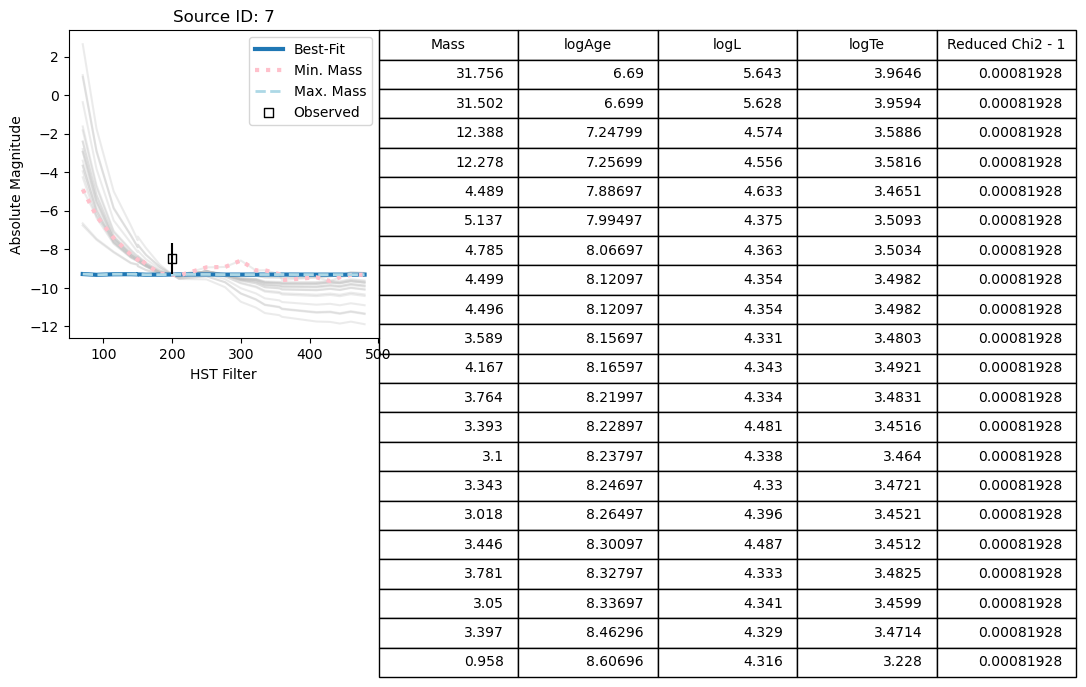

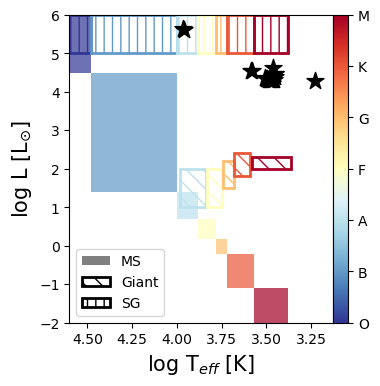

In [88]:
display(Find(xrb_jwst, 'ID = 7'))
bestfit7 = FitSED(df=Find(xrb_jwst, ['ID = 7']), instrument='nircam', idheader='ID', min_models=21, 
       input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')
display(bestfit7)

PlotSED(df_sources=Find(xrb_jwst, ['ID = 7']),
        df_models=bestfit7, 
        idheader='ID', 
        showHR=True)

RA        Dec  ID  F200W ID  F300M ID  F335M ID  F360M ID  \
0  170.070062  12.999924   8    248735       NaN       NaN       NaN   

                  CSC ID  F200Wmag  F200Wmag Err  F300Mmag  F300Mmag Err  \
0  2CXO J112016.8+125959 -8.885451     -0.566544       NaN           NaN   

   F335Mmag  F335Mmag Err  F360Mmag  F360Mmag Err  
0       NaN           NaN       NaN           NaN

Finding best-fit model(s)...
DONE
[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


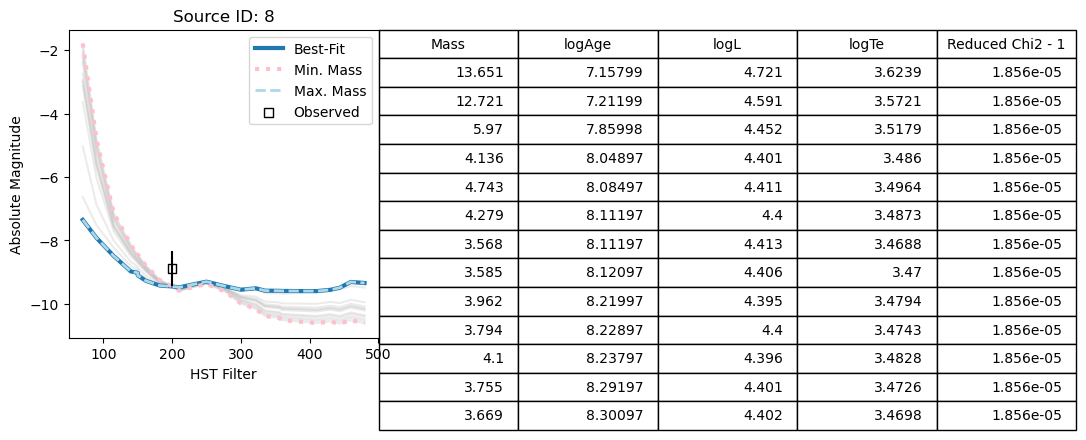

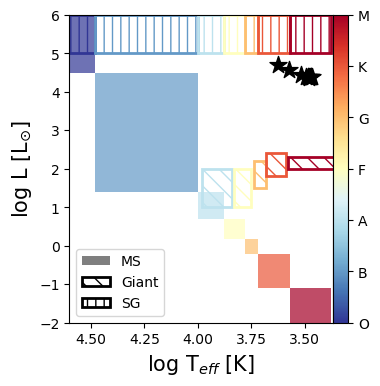

Zini       MH   logAge       Mini   int_IMF    Mass   logL   logTe  \
0   0.0152  0.01508  7.15799  14.448462  2.628936  13.651  4.721  3.6239   
1   0.0152  0.01508  7.21199  12.837743  2.628105  12.721  4.591  3.5721   
2   0.0152  0.01508  7.85998   6.093174  2.618571   5.970  4.452  3.5179   
3   0.0152  0.01508  8.04897   5.076107  2.614453   4.136  4.401  3.4860   
4   0.0152  0.01508  8.08497   4.907578  2.613579   4.743  4.411  3.4964   
5   0.0152  0.01508  8.11197   4.787090  2.612910   4.279  4.400  3.4873   
6   0.0152  0.01508  8.11197   4.787832  2.612914   3.568  4.413  3.4688   
7   0.0152  0.01508  8.12097   4.748894  2.612690   3.585  4.406  3.4700   
8   0.0152  0.01508  8.21997   4.344000  2.610080   3.962  4.395  3.4794   
9   0.0152  0.01508  8.22897   4.310271  2.609837   3.794  4.400  3.4743   
10  0.0152  0.01508  8.23797   4.275942  2.609585   4.100  4.396  3.4828   
11  0.0152  0.01508  8.29197   4.079555  2.608050   3.755  4.401  3.4726   
12  0.0152  0.01508  8.30097   4.047725  2.607785   3.669  4.402  3.4698   

     logg label  ...  F300Mmag  F335Mmag  F360Mmag  F410Mmag  F430Mmag  \
0   0.300     3  ...    -9.555    -9.585    -9.595    -9.600    -9.560   
1   0.192     4  ...    -9.566    -9.610    -9.624    -9.597    -9.534   
2  -0.215     7  ...    -9.566    -9.658    -9.684    -9.622    -9.533   
3  -0.451     8  ...    -9.807   -10.067   -10.150   -10.192   -10.136   
4  -0.360     8  ...    -9.732    -9.926    -9.987   -10.001    -9.939   
5  -0.430     8  ...    -9.769   -10.015   -10.092   -10.120   -10.060   
6  -0.595     8  ...    -9.988   -10.383   -10.515   -10.606   -10.561   
7  -0.582     8  ...    -9.949   -10.331   -10.457   -10.540   -10.492   
8  -0.489     8  ...    -9.803   -10.102   -10.198   -10.241   -10.182   
9  -0.534     8  ...    -9.863   -10.206   -10.319   -10.380   -10.324   
10 -0.462     8  ...    -9.782   -10.058   -10.145   -10.181   -10.121   
11 -0.546     8  ...    -9.880   -10.235   -10.354   -10.420   -10.364   
12 -0.569     8  ...    -9.911   -10.288   -10.414   -10.488   -10.435   

    F460Mmag  F480Mmag Reduced Chi2  Reduced Chi2 - 1  ID  
0     -9.310    -9.343     1.000019          0.000019   8  
1     -9.351    -9.394     1.000019          0.000019   8  
2     -9.439    -9.488     1.000019          0.000019   8  
3    -10.075   -10.163     1.000019          0.000019   8  
4     -9.872    -9.950     1.000019          0.000019   8  
5     -9.998   -10.082     1.000019          0.000019   8  
6    -10.516   -10.613     1.000019          0.000019   8  
7    -10.445   -10.541     1.000019          0.000019   8  
8    -10.126   -10.213     1.000019          0.000019   8  
9    -10.272   -10.363     1.000019          0.000019   8  
10   -10.062   -10.148     1.000019          0.000019   8  
11   -10.314   -10.406     1.000019          0.000019   8  
12   -10.387   -10.481     1.000019          0.000019   8  

[13 rows x 53 columns]

In [96]:
display(Find(xrb_jwst, 'ID = 8'))
bestfit8 = FitSED(df=Find(xrb_jwst, ['ID = 8']), instrument='nircam', idheader='ID', min_models=13, 
       input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')

PlotSED(df_sources=Find(xrb_jwst, ['ID = 8']), df_models=bestfit8, idheader='ID', showHR=True)

display(bestfit8)